In [ ]:
import numpy as np

def generate_data(num_samples):
    """Generates dataset of 50x50 images with one pixel set to 255.

    Args:
    num_samples: The number of images to generate.

    Returns:
    A tuple containing the images and coordinates.
    """

    images = []
    coordinates = []

    for _ in range(num_samples):
        image = np.zeros((50, 50), dtype=np.uint8)
        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)
        image[x, y] = 255
        images.append(image)
        coordinates.append([x, y])

    return np.array(images), np.array(coordinates)

# Generate 10,000 images for training and 2,000 for validation
train_images, train_coordinates = generate_data(10000)
val_images, val_coordinates = generate_data(2000)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)  # Output layer for x, y coordinates
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_images[..., np.newaxis],  # Add channel dimension
    train_coordinates,
    epochs=10,
    batch_size=32,
    validation_data=(val_images[..., np.newaxis], val_coordinates)
)

# Evaluate the model
loss, mae = model.evaluate(val_images[..., np.newaxis], val_coordinates)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation MAE: {mae:.4f}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 80.7479 - mae: 4.9024 - val_loss: 1.6648 - val_mae: 0.9262
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2360 - mae: 0.7812 - val_loss: 0.6294 - val_mae: 0.6034
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5068 - mae: 0.5172 - val_loss: 0.3932 - val_mae: 0.4640
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4446 - mae: 0.4919 - val_loss: 0.9685 - val_mae: 0.7264
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.8088 - mae: 0.6552 - val_loss: 0.6544 - val_mae: 0.6133
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5724 - mae: 0.5564 - val_loss: 0.2164 - val_mae: 0.3441
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3226 - mae: 0.4211 - val_loss: 0.8832 - val_mae: 0.7305
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5164 - mae: 0.5298 - val_loss: 0.2014 - val_mae: 0.3350
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - l

Graphs: Loss and MAE Curves

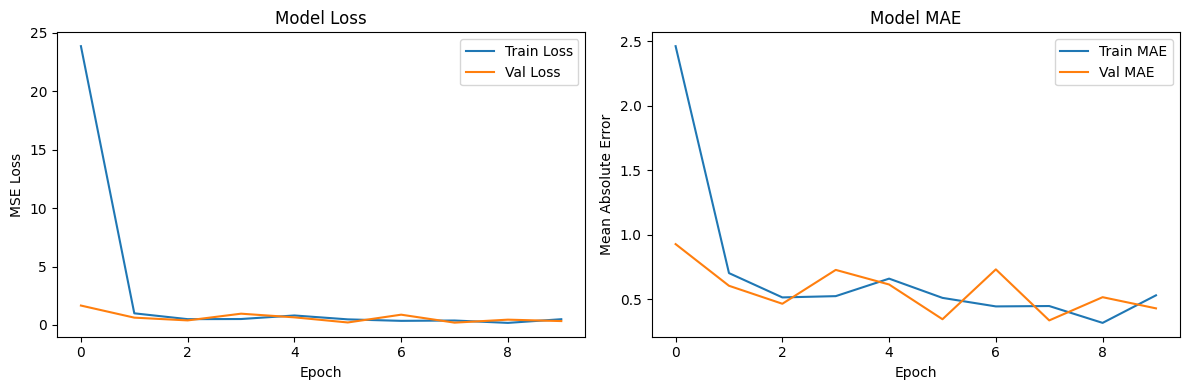

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


Prediction vs Ground Truth Visualization

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


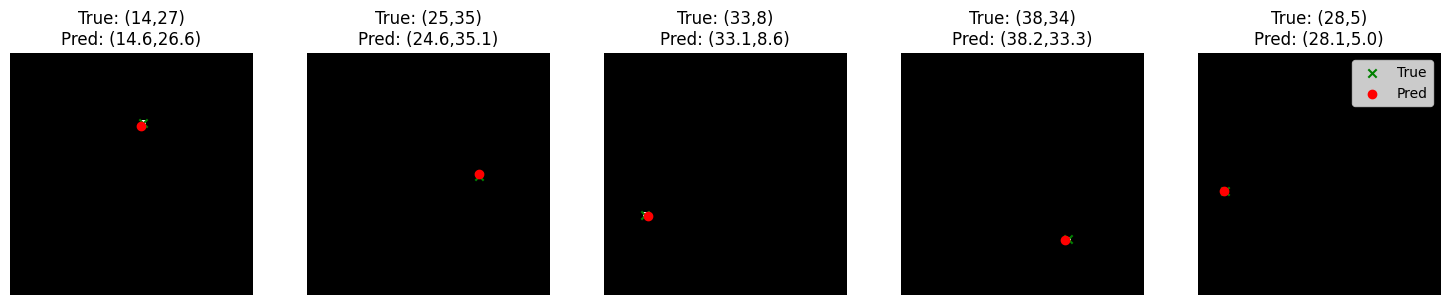

In [ ]:
# Predict on validation data
preds = model.predict(val_images[..., np.newaxis])

# Visualize a few predictions
num_samples = 5
plt.figure(figsize=(15, 3))

for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(val_images[i], cmap='gray')
    true_x, true_y = val_coordinates[i]
    pred_x, pred_y = preds[i]
    plt.scatter([true_y], [true_x], c='green', label='True', marker='x')  # (y, x)
    plt.scatter([pred_y], [pred_x], c='red', label='Pred', marker='o')   # (y, x)
    plt.title(f"True: ({true_x},{true_y})\nPred: ({pred_x:.1f},{pred_y:.1f})")
    plt.axis('off')

plt.legend()
plt.tight_layout()
plt.show()
